<a href="https://colab.research.google.com/github/alif-munim/AR-Examples/blob/master/imagen_text2image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install huggingface huggingface_hub

In [ ]:
! pip install tokenizers sentencepiece sacremoses

In [ ]:
# ! pip install video_diffusion_pytorch

In [ ]:
! pip install --upgrade imageio

In [ ]:
! pip install imageio[pyav]

In [ ]:
! pip install imagen-pytorch

In [ ]:
! nvidia-smi

Fri Feb  3 20:18:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# trainer.save('./path/to/checkpoint.pt')
# trainer.load('./path/to/checkpoint.pt')

In [ ]:
import imageio.v3 as iio
import numpy as np 
import os
import torch
from PIL import Image

In [ ]:
with open('/content/gif_descriptions.txt') as f:
    lines = f.read().splitlines() 

In [ ]:
f = []
gifs = []

for (dirpath, dirnames, filenames) in os.walk('/content/gifs'):
    f.extend(filenames)
    break

for filename in f:
    gifs.append(int(os.path.splitext(filename)[0]))
    
gifs = sorted(gifs)

In [ ]:
# Sometimes iio throws an error; just run the cell again
# Otherwise, pip install --upgrade imageio

# If you get pillow errors, restart the runtime
count = 0
gif_tensors = []
gif_descriptions = []

for gif in gifs:
    im_path = '/content/gifs/' + str(gif) + '.gif'

    im = iio.imread(im_path, index=None)
    gif_arr = np.asarray([im])
    gif_arr = np.moveaxis(gif_arr, -1, 1)
    gif_tensor = torch.from_numpy(gif_arr)
    gif_tensor = gif_tensor.type(torch.float32)
    gif_tensor = gif_tensor.to(device="cuda")

    # print(gif_tensor.shape)

    gif_desc = [lines[count]]
    count += 1

    gif_tensors.append(gif_tensor)
    gif_descriptions.append(gif_desc)

In [ ]:
# for img in gifs:
#   im_path = '/content/gifs/' + str(gif) + '.gif'
#   im = iio.imread(im_path, index=None)
#   im = Image.fromarray(im[0])

#   img_arr = np.array(img_descriptions)

In [ ]:
count = 0
img_tensors = []
img_descriptions = []

for img in gifs:
  im_path = '/content/gifs/' + str(gif) + '.gif'
  im = iio.imread(im_path, index=None)
  im = Image.fromarray(im[0])

  img_arr = np.array(im)
  img_tensor = torch.from_numpy(img_arr)

  img_tensor = img_tensor.type(torch.float32)
  img_tensor = img_tensor.to(device="cuda")

  img_desc = [lines[count]]
  count += 1

  img_tensors.append(img_tensor)
  img_descriptions.append(img_desc)

In [ ]:
x = img_tensors[0].cpu().detach().numpy()
x = x.astype(np.uint8)

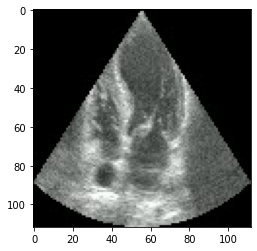

In [ ]:
from matplotlib.pyplot import imshow
imshow(x)

In [ ]:
def get_image(gif):
  im_path = '/content/gifs/' + str(gif) + '.gif'
  im = iio.imread(im_path, index=None)
  im = Image.fromarray(im[0])

  img_arr = np.array(im)
  # img_tensor = torch.from_numpy(img_arr)

  # img_tensor = img_tensor.type(torch.float32)
  # img_tensor = img_tensor.to(device="cuda")

  # img_desc = [lines[count]]
  # count += 1

  # img_tensors.append(img_tensor)
  # img_descriptions.append(img_desc)
  print(img_arr.shape)

  x = img_arr.astype(np.uint8)
  imshow(x)

(112, 112, 3)


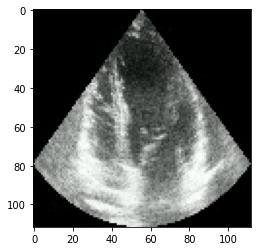

In [ ]:
get_image('0')

(112, 112, 3)


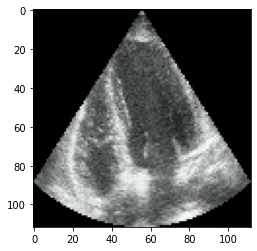

In [ ]:
get_image('2')

In [ ]:
# EVERY VIDEO IS THE SAME!!
# RE-RUN VIDEO DIFFUSION, IMAGEN TEXT TO VIDEO, IMAGEN TEXT TO IMAGE

In [ ]:
# x = Image.fromarray(x) 
# x

In [ ]:
img_batches = []

for i in range(0, len(img_tensors), 4):

  if len(img_tensors) - (i + 3) > 0:
    a = img_tensors[i]
    b = img_tensors[i+1]
    c = img_tensors[i+2]
    d = img_tensors[i+3]

    z = torch.stack((a,b,c,d), dim=0)
    img_batches.append(z)

In [ ]:
# x = img_batches[0].moveaxis(-1,1)

# x = x[0].cpu().detach().numpy()
# x = np.moveaxis(x, 0, -1)

# x = x.astype(np.uint8)
# x = Image.fromarray(x) 
# x

In [ ]:
# y = x.resize((64, 64))
# y

In [ ]:
desc_batches = []

for i in range(0, len(gif_descriptions), 4):

  if len(gif_tensors) - (i + 3) > 0:
    a = gif_descriptions[i][0]
    b = gif_descriptions[i + 1][0]
    c = gif_descriptions[i + 2][0]
    d = gif_descriptions[i + 3][0]

    z = [a,b,c,d]

    desc_batches.append(z)

In [ ]:
desc_batches[0][0]

'age: 56.0, sex: F, ef: 63.2, esv: 34.6, edv: 94.0'

In [ ]:
# from imagen_pytorch import t5

# x = t5.t5_encode_text(desc_batches[0])

In [ ]:
# x.shape

torch.Size([4, 38, 768])

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("t5-large")
# model = T5ForConditionalGeneration.from_pretrained("t5-large")

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
# input_ids = tokenizer("age: 56.0, sex: F, ef: 63.2, esv: 34.6, edv: 94.0", return_tensors="pt").input_ids

In [ ]:
# input_ids.shape

torch.Size([1, 34])

In [ ]:
! pip install --upgrade pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imagen_pytorch import t5

embed_batches = []

for i in range(len(desc_batches)):
  # encoded_input = tokenizer(desc_batches[i], padding=True, return_tensors='pt')
  encoded_input = t5.t5_encode_text(desc_batches[i], name='t5-large')
  embed_batches.append(encoded_input)

In [ ]:
# embed_batches[0]['input_ids'].shape
embed_batches[0].shape

torch.Size([4, 38, 1024])

In [ ]:
# embed_batches = []

# for i in range(0, len(gif_descriptions), 4):

#   if len(gif_tensors) - (i + 3) > 0:

#     a = tokenizer(gif_descriptions[i][0], return_tensors="pt", max_length=50, padding="longest").input_ids
#     b = tokenizer(gif_descriptions[i+1][0], return_tensors="pt", max_length=50, padding="longest").input_ids
#     c = tokenizer(gif_descriptions[i+2][0], return_tensors="pt", max_length=50, padding="longest").input_ids
#     d = tokenizer(gif_descriptions[i+3][0], return_tensors="pt", max_length=50, padding="longest").input_ids

#     z = torch.stack((a,b,c,d), dim=0)
#     embed_batches.append(z)

In [ ]:
# embed_batches[1]

In [ ]:
# embed_batches[1].shape

In [ ]:
desc_batches[1]

['age: 74.0, sex: M, ef: 55.8, esv: 35.6, edv: 80.6',
 'age: 70.0, sex: M, ef: 52.5, esv: 46.8, edv: 98.6',
 'age: 51.0, sex: M, ef: 36.3, esv: 139.1, edv: 218.6',
 'age: 50.0, sex: M, ef: 31.6, esv: 206.2, edv: 301.5']

In [ ]:
# for i in range(len(gif_batches)):
#   print(gif_batches[i].shape)

In [ ]:
# a = gif_batches[0][0]
# b = gif_batches[1][0]
# c = gif_batches[2][0]
# d = gif_batches[3][0]

# z = torch.stack((a,b,c,d), dim=0)
# z.shape

In [ ]:
len(img_batches)

93

In [ ]:
len(desc_batches)

93

In [ ]:
# # wrap imagen with the trainer class

# trainer = ImagenTrainer(imagen)

# # mock images (get a lot of this) and text encodings from large T5

# text_embeds = torch.randn(64, 256, 1024).cuda()
# images = torch.randn(64, 3, 256, 256).cuda()

# # feed images into imagen, training each unet in the cascade

# loss = trainer(
#     images,
#     text_embeds = text_embeds,
#     unet_number = 1,            # training on unet number 1 in this example, but you will have to also save checkpoints and then reload and continue training on unet number 2
#     max_batch_size = 4          # auto divide the batch of 64 up into batch size of 4 and accumulate gradients, so it all fits in memory
# )

# trainer.update(unet_number = 1)

# # do the above for many many many many steps
# # now you can sample an image based on the text embeddings from the cascading ddpm

# images = trainer.sample(texts = [
#     'a puppy looking anxiously at a giant donut on the table',
#     'the milky way galaxy in the style of monet'
# ], cond_scale = 3.)

# images.shape # (2, 3, 256, 256)

In [ ]:
# wrap imagen with the trainer class

# mock images (get a lot of this) and text encodings from large T5

# text_embeds = torch.randn(64, 256, 1024).cuda()
# images = torch.randn(64, 3, 256, 256).cuda()

# feed images into imagen, training each unet in the cascade

# loss = trainer(
#     images,
#     text_embeds = text_embeds,
#     unet_number = 1,            # training on unet number 1 in this example, but you will have to also save checkpoints and then reload and continue training on unet number 2
#     max_batch_size = 4          # auto divide the batch of 64 up into batch size of 4 and accumulate gradients, so it all fits in memory
# )

# trainer.update(unet_number = 1)

# # do the above for many many many many steps
# # now you can sample an image based on the text embeddings from the cascading ddpm

# images = trainer.sample(texts = [
#     'a puppy looking anxiously at a giant donut on the table',
#     'the milky way galaxy in the style of monet'
# ], cond_scale = 3.)

# images.shape # (2, 3, 256, 256)

In [ ]:
img_batches[0].moveaxis(-1, 1).shape

torch.Size([4, 3, 112, 112])

In [ ]:
desc_batches[0]

['age: 56.0, sex: F, ef: 63.2, esv: 34.6, edv: 94.0',
 'age: 36.0, sex: F, ef: 55.4, esv: 47.1, edv: 105.7',
 'age: 79.0, sex: F, ef: 62.1, esv: 37.1, edv: 97.9',
 'age: 78.0, sex: F, ef: 53.4, esv: 32.8, edv: 70.5']

In [ ]:
import torch
from imagen_pytorch import Unet, Imagen, ImagenTrainer

# unet for imagen

unet1 = Unet(
    dim = 32,
    cond_dim = 512,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = 3,
    layer_attns = (False, True, True, True),
)

# unet2 = Unet(
#     dim = 32,
#     cond_dim = 512,
#     dim_mults = (1, 2, 4, 8),
#     num_resnet_blocks = (2, 4, 8, 8),
#     layer_attns = (False, False, False, True),
#     layer_cross_attns = (False, False, False, True)
# )

# imagen, which contains the unets above (base unet and super resoluting ones)

imagen = Imagen(
    unets = (unet1),
    text_encoder_name = 't5-large',
    image_sizes = (112),
    timesteps = 1000,
    cond_drop_prob = 0.1
).cuda()

In [ ]:
trainer = ImagenTrainer(imagen)
trainer.load('imagen_1unet_text2image_epoch75.ckpt')
current_epoch = 75
num_epochs = 50

for epoch in range(num_epochs):

  print(f'Beginning epoch {current_epoch + epoch + 1}...')

  for i in range(len(img_batches)):
    image_batch = img_batches[i]
    image_batch = image_batch.moveaxis(-1, 1)
    image_batch = image_batch.to(device="cuda")
    # embed_batch = embed_batches[i]['input_ids']
    embed_batch = embed_batches[i]
    # text_batch = text_batch.cuda()

    loss = trainer(
      image_batch,
      text_embeds = embed_batch,
      unet_number = 1,            # training on unet number 1 in this example, but you will have to also save checkpoints and then reload and continue training on unet number 2
      max_batch_size = 4          # auto divide the batch of 64 up into batch size of 4 and accumulate gradients, so it all fits in memory
    )

    trainer.update(unet_number = 1)

    if i % 5 == 0 or i == (len(img_batches) - 1):
      print(f'Image batches processed: {i}/{len(img_batches)}')

  if ((current_epoch + epoch + 1) % 5) == 0:
    trainer.save(f'imagen_1unet_text2image_epoch{current_epoch + epoch + 1}.ckpt')
    print(f'Saved checkpoint for epoch {current_epoch + epoch + 1}')
  
  print(f'\n\n')

In [ ]:
# trainer = ImagenTrainer(imagen)
checkpoint_epoch = 25
num_epochs = 25

for epoch in range(num_epochs):

  print(f'Beginning epoch {checkpoint_epoch + epoch + 1}...')

  for i in range(len(img_batches)):
    image_batch = img_batches[i]
    image_batch = image_batch.moveaxis(-1, 1)
    image_batch = image_batch.to(device="cuda")
    # embed_batch = embed_batches[i]['input_ids']
    embed_batch = embed_batches[i]
    # text_batch = text_batch.cuda()

    loss = trainer(
      image_batch,
      text_embeds = embed_batch,
      unet_number = 1,            # training on unet number 1 in this example, but you will have to also save checkpoints and then reload and continue training on unet number 2
      max_batch_size = 4          # auto divide the batch of 64 up into batch size of 4 and accumulate gradients, so it all fits in memory
    )

    trainer.update(unet_number = 1)

    if i % 5 == 0 or i == (len(img_batches) - 1):
      print(f'Image batches processed: {i}/{len(img_batches)}')

  if (epoch + 1) % 5 == 0:
  #   torch.save(diffusion.state_dict(), f'text2vid_epoch{epoch}.ckpt')
    trainer.save(f'imagen_text2image_epoch{checkpoint_epoch + epoch + 1}.ckpt')
  
  print(f'\n\n')

In [ ]:
# trainer = ImagenTrainer(imagen)
checkpoint_epoch = 50
num_epochs = 25

for epoch in range(num_epochs):

  print(f'Beginning epoch {checkpoint_epoch + epoch + 1}...')

  for i in range(len(img_batches)):
    image_batch = img_batches[i]
    image_batch = image_batch.moveaxis(-1, 1)
    image_batch = image_batch.to(device="cuda")
    # embed_batch = embed_batches[i]['input_ids']
    embed_batch = embed_batches[i]
    # text_batch = text_batch.cuda()

    loss = trainer(
      image_batch,
      text_embeds = embed_batch,
      unet_number = 1,            # training on unet number 1 in this example, but you will have to also save checkpoints and then reload and continue training on unet number 2
      max_batch_size = 4          # auto divide the batch of 64 up into batch size of 4 and accumulate gradients, so it all fits in memory
    )

    trainer.update(unet_number = 1)

    if i % 5 == 0 or i == (len(img_batches) - 1):
      print(f'Image batches processed: {i}/{len(img_batches)}')

  if (epoch + 1) % 5 == 0:
  #   torch.save(diffusion.state_dict(), f'text2vid_epoch{epoch}.ckpt')
    trainer.save(f'imagen_text2image_epoch{checkpoint_epoch + epoch + 1}.ckpt')
  
  print(f'\n\n')

In [ ]:
# trainer = ImagenTrainer(imagen)
checkpoint_epoch = 75
num_epochs = 25

for epoch in range(num_epochs):

  print(f'Beginning epoch {checkpoint_epoch + epoch + 1}...')

  for i in range(len(img_batches)):
    image_batch = img_batches[i]
    image_batch = image_batch.moveaxis(-1, 1)
    image_batch = image_batch.to(device="cuda")
    # embed_batch = embed_batches[i]['input_ids']
    embed_batch = embed_batches[i]
    # text_batch = text_batch.cuda()

    loss = trainer(
      image_batch,
      text_embeds = embed_batch,
      unet_number = 1,            # training on unet number 1 in this example, but you will have to also save checkpoints and then reload and continue training on unet number 2
      max_batch_size = 4          # auto divide the batch of 64 up into batch size of 4 and accumulate gradients, so it all fits in memory
    )

    trainer.update(unet_number = 1)

    if i % 5 == 0 or i == (len(img_batches) - 1):
      print(f'Image batches processed: {i}/{len(img_batches)}')

  if (epoch + 1) % 5 == 0:
  #   torch.save(diffusion.state_dict(), f'text2vid_epoch{epoch}.ckpt')
    trainer.save(f'imagen_text2image_epoch{checkpoint_epoch + epoch + 1}.ckpt')
  
  print(f'\n\n')

In [ ]:
from google.colab import files
files.download('imagen_text2image_epoch24.ckpt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
desc_batches[0]

['age: 56.0, sex: F, ef: 63.2, esv: 34.6, edv: 94.0',
 'age: 36.0, sex: F, ef: 55.4, esv: 47.1, edv: 105.7',
 'age: 79.0, sex: F, ef: 62.1, esv: 37.1, edv: 97.9',
 'age: 78.0, sex: F, ef: 53.4, esv: 32.8, edv: 70.5']

In [ ]:
images = imagen.sample(
    texts = desc_batches[0],            
    cond_scale = 3.)

0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
images.shape

torch.Size([4, 3, 224, 224])

In [ ]:
images[0].moveaxis(0,-1).shape

torch.Size([224, 224, 3])

In [ ]:
x = images[2].cpu().detach().numpy()
x = np.moveaxis(x, 0, -1)
x.shape

(224, 224, 3)

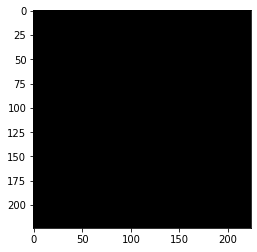

In [ ]:
# x = img_tensors[0].cpu().detach().numpy()
# x = x
x = x.astype(np.uint8)

from matplotlib.pyplot import imshow
imshow(x)

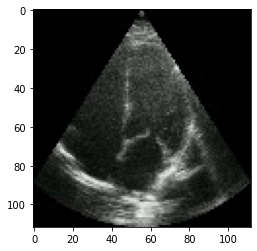

In [ ]:
x = img_batches[50][0]
x = x.cpu().detach().numpy()
x = x.astype(np.uint8)

from matplotlib.pyplot import imshow
imshow(x)

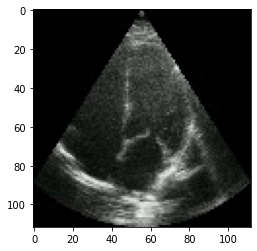

In [ ]:
x = img_batches[4][3]
x = x.cpu().detach().numpy()
x = x.astype(np.uint8)

from matplotlib.pyplot import imshow
imshow(x)

In [ ]:
import torch
from imagen_pytorch import Unet, NullUnet, Imagen

# unet for imagen

unet1 = NullUnet()  # add a placeholder "null" unet for the base unet

unet2 = Unet(
    dim = 32,
    cond_dim = 512,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = (2, 4, 8, 8),
    layer_attns = (False, False, False, True),
    layer_cross_attns = (False, False, False, True)
)

# imagen, which contains the unets above (base unet and super resoluting ones)

imagen = Imagen(
    unets = (unet1, unet2),
    image_sizes = (64, 256),
    timesteps = 250,
    cond_drop_prob = 0.1
).cuda()

# mock images (get a lot of this) and text encodings from large T5

text_embeds = torch.randn(4, 256, 768).cuda()
images = torch.randn(4, 3, 256, 256).cuda()

# feed images into imagen, training each unet in the cascade

loss = imagen(images, text_embeds = text_embeds, unet_number = 2)
loss.backward()

# do the above for many many many many steps
# now you can sample an image based on the text embeddings as well as low resolution images

lowres_images = torch.randn(3, 3, 64, 64).cuda()  # starting un-resoluted images

images = imagen.sample(
    texts = [
        'a whale breaching from afar',
        'young girl blowing out candles on her birthday cake',
        'fireworks with blue and green sparkles'
    ],
    start_at_unet_number = 2,              # start at unet number 2
    start_image_or_video = lowres_images,  # pass in low resolution images to be resoluted
    cond_scale = 3.)

images.shape # (3, 3, 256, 256)

KeyboardInterrupt: ignored

In [ ]:
import torch
from video_diffusion_pytorch import Unet3D, GaussianDiffusion

model = Unet3D(
    dim = 64,
    use_bert_text_cond = True,  # this must be set to True to auto-use the bert model dimensions
    dim_mults = (1, 2, 4, 8),
)

diffusion = GaussianDiffusion(
    model,
    image_size = 112,    # height and width of frames
    num_frames = 16,     # number of video frames
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
)

model = model.to(device="cuda")
diffusion = diffusion.to(device="cuda")

In [ ]:
diffusion = GaussianDiffusion(
    model,
    image_size = 112,    # height and width of frames
    num_frames = 16,     # number of video frames
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
)
diffusion = diffusion.to(device="cuda")

diffusion.load_state_dict(torch.load('text2vid_epoch0.ckpt'))

<All keys matched successfully>

In [ ]:
# videos = torch.randn(3, 3, 5, 32, 32) # video (batch, channels, frames, height, width)
# videos = gif_batches[0].type(torch.float32)
# videos = videos.to(device="cuda")


# text = [
#     'a whale breaching from afar',
#     'young girl blowing out candles on her birthday cake',
#     'fireworks with blue and green sparkles'
# ]
# text = gif_descriptions[0]

# loss = diffusion(videos, cond = text)
# loss.backward()
# after a lot of training

# sampled_videos = diffusion.sample(cond = text, cond_scale = 2)
# sampled_videos.shape # (3, 3, 5, 32, 32)

In [ ]:
num_epochs = 1

for epoch in range(num_epochs):

  print(f'Beginning epoch {epoch}...')

  for i in range(len(gif_batches)):
    video = gif_batches[i]
    video = video.to(device="cuda")
    text = gif_descriptions[i]

    loss = diffusion(video, cond = text)
    loss.backward()

    if i % 50 == 0 or i == (len(gif_batches) - 1):
      print(f'Videos processed: {i}/{len(gif_batches)}')

  if epoch % 1 == 0:
    torch.save(diffusion.state_dict(), f'text2vid_epoch{epoch}.ckpt')
  
  print(f'\n\n')

Beginning epoch 0...
Videos processed: 0/373
Videos processed: 50/373
Videos processed: 100/373
Videos processed: 150/373
Videos processed: 200/373
Videos processed: 250/373
Videos processed: 300/373
Videos processed: 350/373
Videos processed: 372/373





In [ ]:
from google.colab import files
files.download('text2vid_epoch0.ckpt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Sample

In [ ]:
import torch
from video_diffusion_pytorch import Unet3D, GaussianDiffusion

model = Unet3D(
    dim = 64,
    use_bert_text_cond = True,  # this must be set to True to auto-use the bert model dimensions
    dim_mults = (1, 2, 4, 8),
)

model = model.to(device="cuda")

In [ ]:
diffusion = GaussianDiffusion(
    model,
    image_size = 112,    # height and width of frames
    num_frames = 16,     # number of video frames
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
)
diffusion = diffusion.to(device="cuda")

diffusion.load_state_dict(torch.load('text2vid_epoch20.ckpt'))

<All keys matched successfully>

In [ ]:
text_sample = 'age: 56.0, sex: F, ef: 63.2, esv: 34.6, edv: 94.0'

In [ ]:
sampled_videos = diffusion.sample(cond = [text_sample], cond_scale = 2)
sampled_videos.shape # (3, 3, 5, 32, 32)

/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/huggingface/pytorch-transformers/zipball/main" to /root/.cache/torch/hub/main.zip


Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
sampling loop time step: 100%|██████████| 1000/1000 [20:20<00:00,  1.22s/it]


torch.Size([1, 3, 16, 112, 112])

In [ ]:
import numpy as np

video = sampled_videos[0].cpu().detach().numpy()

video_frames = np.moveaxis(video, [0, 1], [-1, 0])
video_frames.shape

(16, 112, 112, 3)

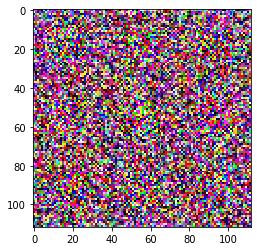

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(video_frames[0], interpolation='nearest')
plt.show()

In [ ]:
import numpy as np
from PIL import Image

imgs = video_frames * 255
imgs = imgs.astype(np.uint8)
imgs = [Image.fromarray(img) for img in imgs]
# duration is the number of milliseconds between frames; this is 40 frames per second
imgs[0].save("array.gif", save_all=True, append_images=imgs[1:], duration=70, loop=0)

In [ ]:
imgs = video_frames * 255
imgs = imgs.astype(np.uint8)

In [ ]:
imgs = [Image.fromarray(img) for img in imgs]

In [ ]:
type(imgs[0])

PIL.Image.Image

In [ ]:
np.save('sample.npy', imgs)

In [ ]:
sample = np.load('sample.npy')

In [ ]:
sample = [Image.fromarray(img) for img in sample]

In [ ]:
type(sample[0])

PIL.Image.Image

In [ ]:
sample.shape

(16, 112, 112, 3)

In [ ]:
import numpy as np
from PIL import Image

sample = np.load('sample.npy')
sample = [Image.fromarray(img) for img in sample]
sample[0].save("sample_01.gif", save_all=True, append_images=sample[1:], duration=70, loop=0)


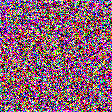

In [ ]:
from IPython.core.display import HTML
import base64

gif_path = '/content/array.gif'

b64 = base64.b64encode(open(gif_path,'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" width="200"/>'))